# Test-retest study on UW data using asymmetry index
In this script I will do a test retest study on some FSPGR and MPRAGE MRI sequencings. I follow the proccess from a matlab code, written by Ali Deatsch.

FSPGR all are cancer patients, MPRAGE are all healthy. Both are NC.

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import itertools
import matplotlib.patches as mpatches

In [2]:
from test_retest_functions import *

In [68]:
fspgrPath = '../../UW_data/Test-retest_UWCCC_MRI_AxT1_FSPGRbravo_refined/'
mpragePath = '../../UW_data/Test-retest_NITRCKirby_MRI_T1_MPRAGE/'

maskPath = 'C:/Users/Crt/Documents/WIMR/asymmetryAD/UW_data/AAL3+pons/'

savePath = '../results/test_retest/'

## Dataset analysis
Firstly I will take a look at my dataset: number of subjects, number of longitudinal scans, median time between scans...

In [4]:
fspgr_patient_scans = count_patients_scan(fspgrPath, mpragePath)[0]
mprage_patient_scans = count_patients_scan(fspgrPath, mpragePath)[1]

In [5]:
print(f"Number of different patients with FSPGR scan: {len(fspgr_patient_scans)}\n")

for patient_id, scan_count in fspgr_patient_scans.items():
    print(f"Patient ID: {patient_id} - Number of scans: {scan_count}")

print('--------------------------------------------------------------')

print(f"Number of different patients with MPRAGE scan: {len(mprage_patient_scans)}\n")

for patient_id, scan_count in mprage_patient_scans.items():
    print(f"Patient ID: {patient_id} - Number of scans: {scan_count}")

Number of different patients with FSPGR scan: 16

Patient ID: GJDGYD - Number of scans: 2
Patient ID: GJDGYR - Number of scans: 2
Patient ID: GJDGYZ - Number of scans: 2
Patient ID: GJDGZH - Number of scans: 3
Patient ID: GJDGZW - Number of scans: 2
Patient ID: GJDH1X - Number of scans: 2
Patient ID: GJDH22 - Number of scans: 2
Patient ID: GJDH2A - Number of scans: 2
Patient ID: GJDH2Z - Number of scans: 2
Patient ID: GJDH4C - Number of scans: 2
Patient ID: GJDH4Q - Number of scans: 2
Patient ID: GJDHDK - Number of scans: 2
Patient ID: GJDHVO - Number of scans: 3
Patient ID: GJDHZ6 - Number of scans: 2
Patient ID: GJDHZF - Number of scans: 2
Patient ID: GJDI07 - Number of scans: 2
--------------------------------------------------------------
Number of different patients with MPRAGE scan: 21

Patient ID: S113 - Number of scans: 2
Patient ID: S127 - Number of scans: 2
Patient ID: S142 - Number of scans: 2
Patient ID: S239 - Number of scans: 2
Patient ID: S346 - Number of scans: 2
Patien

For now I'm only interested in those with 2 scan. I will filter out the dictionary to contain only those. 

In [6]:
fspgr_patient_scans = {patient_id: scans for patient_id, scans in fspgr_patient_scans.items() if scans == 2}

In [7]:
print(f"Number of different patients: {len(fspgr_patient_scans)}\n")

for patient_id, scan_count in fspgr_patient_scans.items():
    print(f"Patient ID: {patient_id} - Number of scans: {scan_count}")

Number of different patients: 14

Patient ID: GJDGYD - Number of scans: 2
Patient ID: GJDGYR - Number of scans: 2
Patient ID: GJDGYZ - Number of scans: 2
Patient ID: GJDGZW - Number of scans: 2
Patient ID: GJDH1X - Number of scans: 2
Patient ID: GJDH22 - Number of scans: 2
Patient ID: GJDH2A - Number of scans: 2
Patient ID: GJDH2Z - Number of scans: 2
Patient ID: GJDH4C - Number of scans: 2
Patient ID: GJDH4Q - Number of scans: 2
Patient ID: GJDHDK - Number of scans: 2
Patient ID: GJDHZ6 - Number of scans: 2
Patient ID: GJDHZF - Number of scans: 2
Patient ID: GJDI07 - Number of scans: 2


Now I want to calculate the median, max and min time between two scans. 

In [8]:
fspgr_scan_dates = date_of_scans(fspgrPath, fspgr_patient_scans)

In [9]:
for patient_id, dates in fspgr_scan_dates.items():
    print(f"Patient {patient_id} has scan dates: {dates}")

Patient GJDGYD has scan dates: ['2012-06-17', '2012-06-29']
Patient GJDGYR has scan dates: ['2019-05-11', '2019-05-15']
Patient GJDGYZ has scan dates: ['2014-11-13', '2014-11-29']
Patient GJDGZW has scan dates: ['2013-03-20', '2013-03-26']
Patient GJDH1X has scan dates: ['2017-05-14', '2017-05-23']
Patient GJDH22 has scan dates: ['2011-02-21', '2011-02-26']
Patient GJDH2A has scan dates: ['2015-09-28', '2015-10-03']
Patient GJDH2Z has scan dates: ['2019-05-14', '2019-05-22']
Patient GJDH4C has scan dates: ['2016-07-10', '2016-07-17']
Patient GJDH4Q has scan dates: ['2015-02-28', '2015-03-09']
Patient GJDHDK has scan dates: ['2016-09-15', '2016-10-03']
Patient GJDHZ6 has scan dates: ['2019-08-19', '2019-09-16']
Patient GJDHZF has scan dates: ['2019-06-11', '2019-07-01']
Patient GJDI07 has scan dates: ['2019-11-09', '2019-11-16']


Finally calculating the time differences.

In [10]:
fspgr_time_between_scans = []

for dates_array in fspgr_scan_dates.values():

    date0 = parser.parse(dates_array[0])
    date1 = parser.parse(dates_array[1])

    diff = date1 - date0

    fspgr_time_between_scans.append(diff.days)

In [11]:
print(fspgr_time_between_scans)

[12, 4, 16, 6, 9, 5, 5, 8, 7, 9, 18, 28, 20, 7]


In [12]:
fspgr_average = np.mean(fspgr_time_between_scans)
fspgr_medi = int(np.median(fspgr_time_between_scans))
fspgr_minimum = np.min(fspgr_time_between_scans)
fspgr_maximum = np.max(fspgr_time_between_scans)

In [13]:
print(f'''Average time between two scans: {fspgr_average} days
Median time between two scans: {fspgr_medi} days
Range: {fspgr_minimum}-{fspgr_maximum} days''')

Average time between two scans: 11.0 days
Median time between two scans: 8 days
Range: 4-28 days


!! MPRAGE scans were all taken on the same day. !!

## Asymmetry index 
I will look at the AI of whole brain region as well as for some of the more important brain regions on their own (frontal lobe, temporal lobe, hippocampus).


Getting the file paths of those patients with 2 scans. 

In [14]:
fspgr_files = filepaths(fspgrPath, mpragePath, fspgr_patient_scans)[0]
mprage_files = filepaths(fspgrPath, mpragePath, mprage_patient_scans)[1]

Separating initial scans from follow up scans. 

In [15]:
first_fspgr = separate_scans(fspgr_files)[0]
second_fspgr = separate_scans(fspgr_files)[1]

first_mprage = separate_scans(mprage_files)[0]
second_mprage = separate_scans(mprage_files)[1]

Flattening and normalizing the scans.

In [16]:
first_fspgr = flatten_and_normalize(first_fspgr)
second_fspgr = flatten_and_normalize(second_fspgr)

first_mprage = flatten_and_normalize(first_mprage)
second_mprage = flatten_and_normalize(second_mprage)

In [17]:
print(first_fspgr.shape)

(902629, 14)


Extracting frontal, temporal lobe and hippocampus from mask. 

In [18]:
mask_L_frontal_lobe = mask_regions(maskPath, flatten=False)[0]
mask_R_frontal_lobe = mask_regions(maskPath, flatten=False)[1]
mask_L_temporal_lobe = mask_regions(maskPath, flatten=False)[2]
mask_R_temporal_lobe = mask_regions(maskPath, flatten=False)[3]
mask_L_hippocampus = mask_regions(maskPath, flatten=False)[4]
mask_R_hippocampus = mask_regions(maskPath, flatten=False)[5]

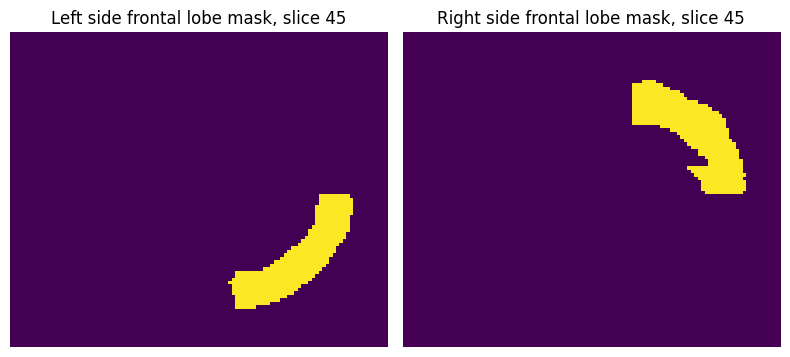

In [19]:
mask_slice_index = 45

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].imshow(mask_L_frontal_lobe[:, :, mask_slice_index])
axs[0].set_title(f'Left side frontal lobe mask, slice {mask_slice_index}')
axs[0].axis('off')
axs[1].imshow(mask_R_frontal_lobe[:, :, mask_slice_index])
axs[1].set_title(f'Right side frontal lobe mask, slice {mask_slice_index}')
axs[1].axis('off')
plt.tight_layout()
plt.show()

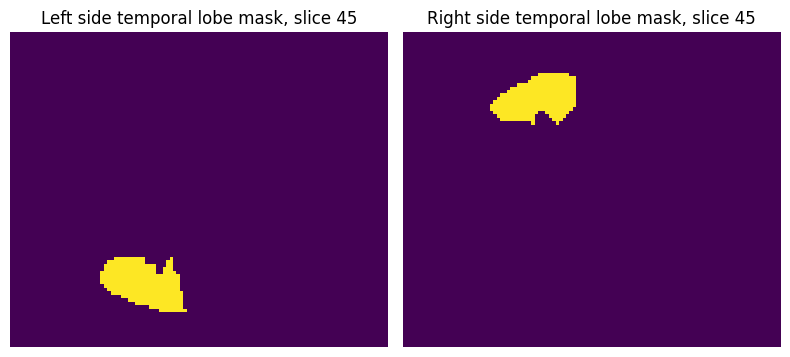

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].imshow(mask_L_temporal_lobe[:, :, mask_slice_index])
axs[0].set_title(f'Left side temporal lobe mask, slice {mask_slice_index}')
axs[0].axis('off')
axs[1].imshow(mask_R_temporal_lobe[:, :, mask_slice_index])
axs[1].set_title(f'Right side temporal lobe mask, slice {mask_slice_index}')
axs[1].axis('off')
plt.tight_layout()
plt.show()

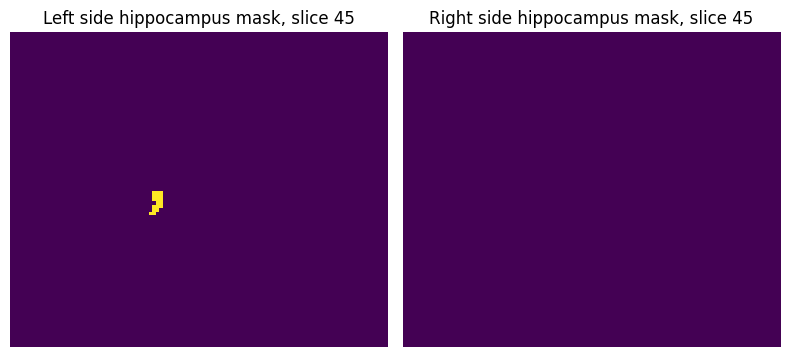

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].imshow(mask_L_hippocampus[:, :, mask_slice_index])
axs[0].set_title(f'Left side hippocampus mask, slice {mask_slice_index}')
axs[0].axis('off')
axs[1].imshow(mask_R_hippocampus[:, :, mask_slice_index])
axs[1].set_title(f'Right side hippocampus mask, slice {mask_slice_index}')
axs[1].axis('off')
plt.tight_layout()
plt.show()

Getting the mask by hemispheres.

In [22]:
left_hemisphere_mask = mask_hemispheres(maskPath + 'AAL3+pons.nii', maskPath + 'AAL3+pons.txt', flatten=False)[0]
right_hemisphere_mask = mask_hemispheres(maskPath + 'AAL3+pons.nii', maskPath + 'AAL3+pons.txt', flatten=False)[1]

In [23]:
print(left_hemisphere_mask.shape)

(91, 109, 91)


Visualizing hemispheres masks.

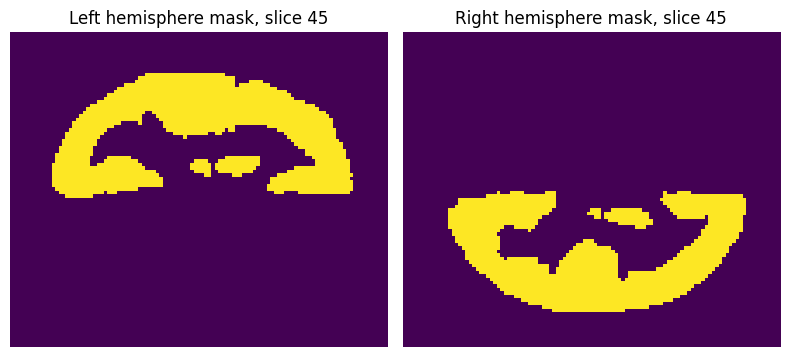

In [24]:
mask_slice_index = 45

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].imshow(left_hemisphere_mask[:, :, mask_slice_index])
axs[0].set_title(f'Left hemisphere mask, slice {mask_slice_index}')
axs[0].axis('off')
axs[1].imshow(right_hemisphere_mask[:, :, mask_slice_index])
axs[1].set_title(f'Right hemisphere mask, slice {mask_slice_index}')
axs[1].axis('off')
plt.tight_layout()
plt.show()

Getting flattened versions of masks.

In [25]:
left_hemisphere_mask = mask_hemispheres(maskPath + 'AAL3+pons.nii', maskPath + 'AAL3+pons.txt', flatten=True)[0]
right_hemisphere_mask = mask_hemispheres(maskPath + 'AAL3+pons.nii', maskPath + 'AAL3+pons.txt', flatten=True)[1]

In [26]:
mask_L_frontal_lobe = mask_regions(maskPath, flatten=True)[0]
mask_R_frontal_lobe = mask_regions(maskPath, flatten=True)[1]
mask_L_temporal_lobe = mask_regions(maskPath, flatten=True)[2]
mask_R_temporal_lobe = mask_regions(maskPath, flatten=True)[3]
mask_L_hippocampus = mask_regions(maskPath, flatten=True)[4]
mask_R_hippocampus = mask_regions(maskPath, flatten=True)[5]

Calculating AI for each .nii image. 

In [27]:
# FSPGR
AI_whole_brain_first_fspgr = calculate_AI(first_fspgr, left_hemisphere_mask, right_hemisphere_mask)
AI_whole_brain_second_fspgr = calculate_AI(second_fspgr, left_hemisphere_mask, right_hemisphere_mask)

AI_frontal_lobe_first_fspgr = calculate_AI(first_fspgr, mask_L_frontal_lobe, mask_R_frontal_lobe)
AI_frontal_lobe_second_fspgr = calculate_AI(second_fspgr, mask_L_frontal_lobe, mask_R_frontal_lobe)

AI_temporal_lobe_first_fspgr = calculate_AI(first_fspgr, mask_L_temporal_lobe, mask_R_temporal_lobe)
AI_temporal_lobe_second_fspgr = calculate_AI(second_fspgr, mask_L_temporal_lobe, mask_R_temporal_lobe)

AI_hippocampus_first_fspgr = calculate_AI(first_fspgr, mask_L_hippocampus, mask_R_hippocampus)
AI_hippocampus_second_fspgr = calculate_AI(second_fspgr, mask_L_hippocampus, mask_R_hippocampus)

In [28]:
# MPRAGE
AI_whole_brain_first_mprage = calculate_AI(first_mprage, left_hemisphere_mask, right_hemisphere_mask)
AI_whole_brain_second_mprage = calculate_AI(second_mprage, left_hemisphere_mask, right_hemisphere_mask)

AI_frontal_lobe_first_mprage = calculate_AI(first_mprage, mask_L_frontal_lobe, mask_R_frontal_lobe)
AI_frontal_lobe_second_mprage = calculate_AI(second_mprage, mask_L_frontal_lobe, mask_R_frontal_lobe)

AI_temporal_lobe_first_mprage = calculate_AI(first_mprage, mask_L_temporal_lobe, mask_R_temporal_lobe)
AI_temporal_lobe_second_mprage = calculate_AI(second_mprage, mask_L_temporal_lobe, mask_R_temporal_lobe)

AI_hippocampus_first_mprage = calculate_AI(first_mprage, mask_L_hippocampus, mask_R_hippocampus)
AI_hippocampus_second_mprage = calculate_AI(second_mprage, mask_L_hippocampus, mask_R_hippocampus)

### Repeatability
Using function from test-retest function to calculate and plot different stuff that tells us about the repeatability of measurments.

Relative difference (RD)

In [29]:
# FSPGR
RD_whole_brain_fspgr = calculate_RD(AI_whole_brain_first_fspgr, AI_whole_brain_second_fspgr)
RD_frontal_lobe_fspgr = calculate_RD(AI_frontal_lobe_first_fspgr, AI_frontal_lobe_second_fspgr)
RD_temporal_lobe_fspgr = calculate_RD(AI_temporal_lobe_first_fspgr, AI_temporal_lobe_second_fspgr)
RD_hippocampus_fspgr = calculate_RD(AI_hippocampus_first_fspgr, AI_hippocampus_second_fspgr)

In [30]:
# MPRAGE
RD_whole_brain_mprage = calculate_RD(AI_whole_brain_first_mprage, AI_whole_brain_second_mprage)
RD_frontal_lobe_mprage = calculate_RD(AI_frontal_lobe_first_mprage, AI_frontal_lobe_second_mprage)
RD_temporal_lobe_mprage = calculate_RD(AI_temporal_lobe_first_mprage, AI_temporal_lobe_second_mprage)
RD_hippocampus_mprage = calculate_RD(AI_hippocampus_first_mprage, AI_hippocampus_second_mprage)

Plotting RD as box plots.

In [31]:
# averages
average_RD_whole_brain_fspgr = np.mean(RD_whole_brain_fspgr)
average_RD_frontal_lobe_fspgr = np.mean(RD_frontal_lobe_fspgr)
average_RD_temporal_lobe_fspgr = np.mean(RD_temporal_lobe_fspgr)
average_RD_hippocampus_fspgr = np.mean(RD_hippocampus_fspgr)

average_RD_whole_brain_mprage = np.mean(RD_whole_brain_mprage)
average_RD_frontal_lobe_mprage = np.mean(RD_frontal_lobe_mprage)
average_RD_temporal_lobe_mprage = np.mean(RD_temporal_lobe_mprage)
average_RD_hippocampus_mprage = np.mean(RD_hippocampus_mprage)

In [32]:
# stds
std_RD_whole_brain_fspgr = np.std(RD_whole_brain_fspgr)
std_RD_frontal_lobe_fspgr = np.std(RD_frontal_lobe_fspgr)
std_RD_temporal_lobe_fspgr = np.std(RD_temporal_lobe_fspgr)
std_RD_hippocampus_fspgr = np.std(RD_hippocampus_fspgr)

std_RD_whole_brain_mprage = np.std(RD_whole_brain_mprage)
std_RD_frontal_lobe_mprage = np.std(RD_frontal_lobe_mprage)
std_RD_temporal_lobe_mprage = np.std(RD_temporal_lobe_mprage)
std_RD_hippocampus_mprage = np.std(RD_hippocampus_mprage)

In [33]:
# maxs
max_RD_whole_brain_fspgr = np.amax(RD_whole_brain_fspgr)
max_RD_frontal_lobe_fspgr = np.amax(RD_frontal_lobe_fspgr)
max_RD_temporal_lobe_fspgr = np.amax(RD_temporal_lobe_fspgr)
max_RD_hippocampus_fspgr = np.amax(RD_hippocampus_fspgr)

max_RD_whole_brain_mprage = np.amax(RD_whole_brain_mprage)
max_RD_frontal_lobe_mprage = np.amax(RD_frontal_lobe_mprage)
max_RD_temporal_lobe_mprage = np.amax(RD_temporal_lobe_mprage)
max_RD_hippocampus_mprage = np.amax(RD_hippocampus_mprage)

In [34]:
# mins
min_RD_whole_brain_fspgr = np.amin(RD_whole_brain_fspgr)
min_RD_frontal_lobe_fspgr = np.amin(RD_frontal_lobe_fspgr)
min_RD_temporal_lobe_fspgr = np.amin(RD_temporal_lobe_fspgr)
min_RD_hippocampus_fspgr = np.amin(RD_hippocampus_fspgr)

min_RD_whole_brain_mprage = np.amin(RD_whole_brain_mprage)
min_RD_frontal_lobe_mprage = np.amin(RD_frontal_lobe_mprage)
min_RD_temporal_lobe_mprage = np.amin(RD_temporal_lobe_mprage)
min_RD_hippocampus_mprage = np.amin(RD_hippocampus_mprage)

FSPGR box plot.

In [35]:
average_RDs_fspgr = [average_RD_whole_brain_fspgr, average_RD_frontal_lobe_fspgr, average_RD_temporal_lobe_fspgr, average_RD_hippocampus_fspgr]
std_devs_fspgr = [std_RD_whole_brain_fspgr, std_RD_frontal_lobe_fspgr, std_RD_temporal_lobe_fspgr, std_RD_hippocampus_fspgr]
max_values_fspgr = [max_RD_whole_brain_fspgr, max_RD_frontal_lobe_fspgr, max_RD_temporal_lobe_fspgr, max_RD_hippocampus_fspgr]
min_values_fspgr = [min_RD_whole_brain_fspgr, min_RD_frontal_lobe_fspgr, min_RD_temporal_lobe_fspgr, min_RD_hippocampus_fspgr]

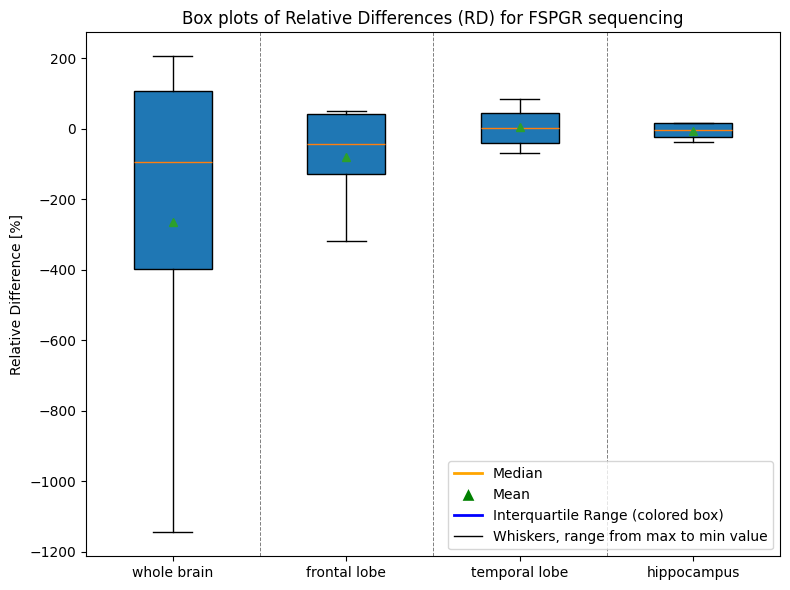

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))
# Construct data for the boxplot
data = [
    [min_values_fspgr[0], average_RDs_fspgr[0] - std_devs_fspgr[0], average_RDs_fspgr[0], average_RDs_fspgr[0] + std_devs_fspgr[0], max_values_fspgr[0]],
    [min_values_fspgr[1], average_RDs_fspgr[1] - std_devs_fspgr[1], average_RDs_fspgr[1], average_RDs_fspgr[1] + std_devs_fspgr[1], max_values_fspgr[1]],
    [min_values_fspgr[2], average_RDs_fspgr[2] - std_devs_fspgr[2], average_RDs_fspgr[2], average_RDs_fspgr[2] + std_devs_fspgr[2], max_values_fspgr[2]],
    [min_values_fspgr[3], average_RDs_fspgr[3] - std_devs_fspgr[3], average_RDs_fspgr[3], average_RDs_fspgr[3] + std_devs_fspgr[3], max_values_fspgr[3]]
]
# Plotting the box plot
ax.boxplot(data, vert=True, patch_artist=True, showmeans=True, 
           flierprops=dict(marker='o', color='gray', alpha=0.5))
# Customizing the plot
ax.set_title('Box plots of Relative Differences (RD) for FSPGR sequencing')
ax.set_ylabel('Relative Difference [%]')
ax.set_xticklabels(['whole brain', 'frontal lobe', 'temporal lobe', 'hippocampus'])  # Customize labels as needed
ax.axvline(x=1.5, color='gray', linestyle='--', linewidth=0.7)  # Vertical line to separate groups
ax.axvline(x=2.5, color='gray', linestyle='--', linewidth=0.7)  # Vertical line to separate groups
ax.axvline(x=3.5, color='gray', linestyle='--', linewidth=0.7)  # Vertical line to separate groups
legend_elements = [
    plt.Line2D([0], [0], color='orange', lw=2, label='Median'),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean'),
    plt.Line2D([0], [0], color='blue', lw=2, label='Interquartile Range (colored box)'),
    plt.Line2D([0], [0], color='black', lw=1, label='Whiskers, range from max to min value'),
]
ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
#plt.savefig(savePath + 'box_fspgr.png')
plt.show()

MPRAGE box plot.

In [37]:
average_RDs_mprage = [average_RD_whole_brain_mprage, average_RD_frontal_lobe_mprage, average_RD_temporal_lobe_mprage, average_RD_hippocampus_mprage]
std_devs_mprage = [std_RD_whole_brain_mprage, std_RD_frontal_lobe_mprage, std_RD_temporal_lobe_mprage, std_RD_hippocampus_mprage]
max_values_mprage = [max_RD_whole_brain_mprage, max_RD_frontal_lobe_mprage, max_RD_temporal_lobe_mprage, max_RD_hippocampus_mprage]
min_values_mprage = [min_RD_whole_brain_mprage, min_RD_frontal_lobe_mprage, min_RD_temporal_lobe_mprage, min_RD_hippocampus_mprage]

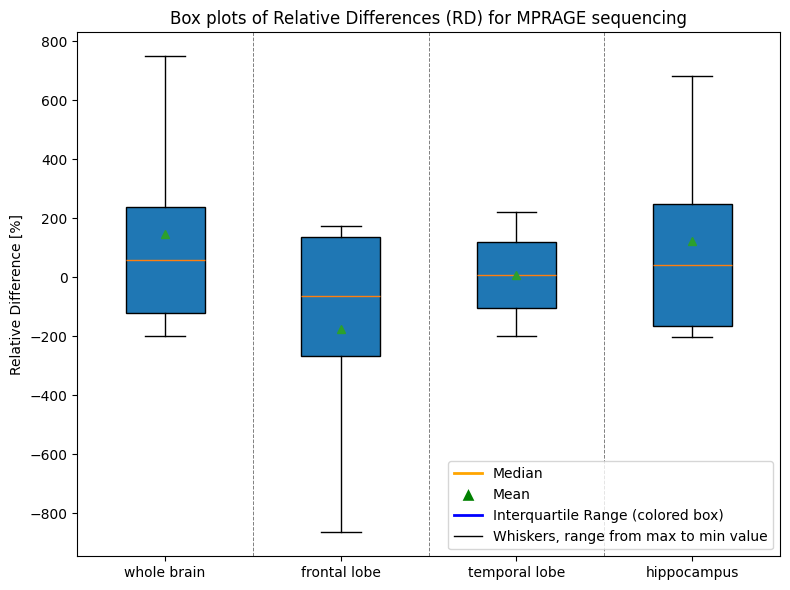

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))
# Construct data for the boxplot
data = [
    [min_values_mprage[0], average_RDs_mprage[0] - std_devs_mprage[0], average_RDs_mprage[0], average_RDs_mprage[0] + std_devs_mprage[0], max_values_mprage[0]],
    [min_values_mprage[1], average_RDs_mprage[1] - std_devs_mprage[1], average_RDs_mprage[1], average_RDs_mprage[1] + std_devs_mprage[1], max_values_mprage[1]],
    [min_values_mprage[2], average_RDs_mprage[2] - std_devs_mprage[2], average_RDs_mprage[2], average_RDs_mprage[2] + std_devs_mprage[2], max_values_mprage[2]],
    [min_values_mprage[3], average_RDs_mprage[3] - std_devs_mprage[3], average_RDs_mprage[3], average_RDs_mprage[3] + std_devs_mprage[3], max_values_mprage[3]]
]
# Plotting the box plot
ax.boxplot(data, vert=True, patch_artist=True, showmeans=True, 
           flierprops=dict(marker='o', color='gray', alpha=0.5))
# Customizing the plot
ax.set_title('Box plots of Relative Differences (RD) for MPRAGE sequencing')
ax.set_ylabel('Relative Difference [%]')
ax.set_xticklabels(['whole brain', 'frontal lobe', 'temporal lobe', 'hippocampus'])  # Customize labels as needed
ax.axvline(x=1.5, color='gray', linestyle='--', linewidth=0.7)  # Vertical line to separate groups
ax.axvline(x=2.5, color='gray', linestyle='--', linewidth=0.7)  # Vertical line to separate groups
ax.axvline(x=3.5, color='gray', linestyle='--', linewidth=0.7)  # Vertical line to separate groups
legend_elements = [
    plt.Line2D([0], [0], color='orange', lw=2, label='Median'),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean'),
    plt.Line2D([0], [0], color='blue', lw=2, label='Interquartile Range (colored box)'),
    plt.Line2D([0], [0], color='black', lw=1, label='Whiskers, range from max to min value'),
]
ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
#plt.savefig(savePath + 'box_mprage.png')
plt.show()

Coefficient of variation (CV) <br> Relative measure of dispersion within replicates.

In [39]:
#FSPGR 
CV_whole_brain_fspgr = calculate_CV(AI_whole_brain_first_fspgr, AI_whole_brain_second_fspgr)
CV_frontal_lobe_fspgr = calculate_CV(AI_frontal_lobe_first_fspgr, AI_frontal_lobe_second_fspgr)
CV_temporal_lobe_fspgr = calculate_CV(AI_temporal_lobe_first_fspgr, AI_temporal_lobe_second_fspgr)
CV_hippocampus_fspgr = calculate_CV(AI_hippocampus_first_fspgr, AI_hippocampus_second_fspgr)

In [40]:
#MPRAGE 
CV_whole_brain_mprage = calculate_CV(AI_whole_brain_first_mprage, AI_whole_brain_second_mprage)
CV_frontal_lobe_mprage = calculate_CV(AI_frontal_lobe_first_mprage, AI_frontal_lobe_second_mprage)
CV_temporal_lobe_mprage = calculate_CV(AI_temporal_lobe_first_mprage, AI_temporal_lobe_second_mprage)
CV_hippocampus_mprage = calculate_CV(AI_hippocampus_first_mprage, AI_hippocampus_second_mprage)

c:\Users\Crt\Documents\WIMR\asymmetryAD\python\code\test_retest_functions.py:295: RuntimeWarning: invalid value encountered in scalar divide
  return 100 * sigma / mu


Intraclass Correlation Coefficient (ICC) <br>
Describes how strongly units in the same group resemble each other. 
Ratio of variance between subject measurements to the total variance.


In [41]:
#FSPGR 
ICC_whole_brain_fspgr = calculate_ICC(AI_whole_brain_first_fspgr, AI_whole_brain_second_fspgr)
ICC_frontal_lobe_fspgr = calculate_ICC(AI_frontal_lobe_first_fspgr, AI_frontal_lobe_second_fspgr)
ICC_temporal_lobe_fspgr = calculate_ICC(AI_temporal_lobe_first_fspgr, AI_temporal_lobe_second_fspgr)
ICC_hippocampus_fspgr = calculate_ICC(AI_hippocampus_first_fspgr, AI_hippocampus_second_fspgr)

In [42]:
#MPRAGE 
ICC_whole_brain_mprage = calculate_ICC(AI_whole_brain_first_mprage, AI_whole_brain_second_mprage)
ICC_frontal_lobe_mprage = calculate_ICC(AI_frontal_lobe_first_mprage, AI_frontal_lobe_second_mprage)
ICC_temporal_lobe_mprage = calculate_ICC(AI_temporal_lobe_first_mprage, AI_temporal_lobe_second_mprage)
ICC_hippocampus_mprage = calculate_ICC(AI_hippocampus_first_mprage, AI_hippocampus_second_mprage)

Plotting ICC vs CV.

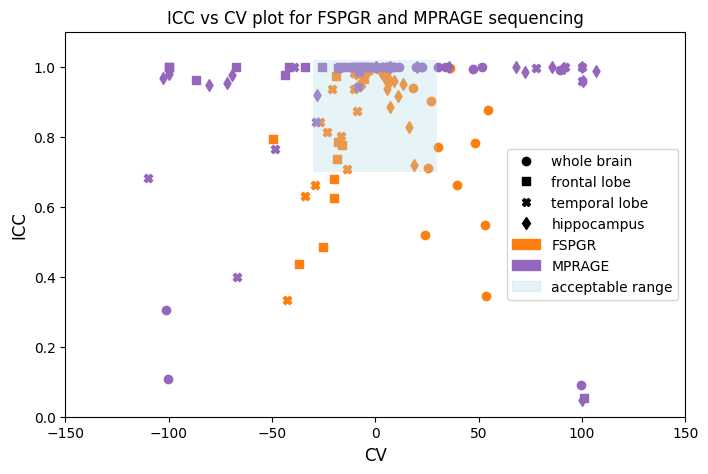

In [71]:
plt.figure(figsize=(8, 5))

plt.scatter(CV_whole_brain_fspgr, ICC_whole_brain_fspgr, marker='o', color='tab:orange', label='FSPGR')
plt.scatter(CV_frontal_lobe_fspgr, ICC_frontal_lobe_fspgr, marker='s', color='tab:orange')
plt.scatter(CV_temporal_lobe_fspgr, ICC_temporal_lobe_fspgr, marker='X', color='tab:orange')
plt.scatter(CV_hippocampus_fspgr, ICC_hippocampus_fspgr, marker='d', color='tab:orange')

plt.scatter(CV_whole_brain_mprage, ICC_whole_brain_mprage, marker='o', color='tab:purple', label='MPRAGE')
plt.scatter(CV_frontal_lobe_mprage, ICC_frontal_lobe_mprage, marker='s', color='tab:purple')
plt.scatter(CV_temporal_lobe_mprage, ICC_temporal_lobe_mprage, marker='X', color='tab:purple')
plt.scatter(CV_hippocampus_mprage, ICC_hippocampus_mprage, marker='d', color='tab:purple')

plt.xlim(-150, 150)
plt.ylim(0, 1.1)

plt.xlabel('CV', fontsize=12)
plt.ylabel('ICC', fontsize=12)
plt.title('ICC vs CV plot for FSPGR and MPRAGE sequencing')

# Custom legend handles for shapes
shape_whole_brain = plt.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label='whole brain')
shape_frontal_lobe = plt.Line2D([], [], color='black', marker='s', linestyle='None', markersize=6, label='frontal lobe')
shape_temporal_lobe = plt.Line2D([], [], color='black', marker='X', linestyle='None', markersize=6, label='temporal lobe')
shape_hippocampus = plt.Line2D([], [], color='black', marker='d', linestyle='None', markersize=6, label='hippocampus')

# Custom legend handles for colors
color_fspgr = mpatches.Patch(color='tab:orange', label='FSPGR')
color_mprage = mpatches.Patch(color='tab:purple', label='MPRAGE')
color_rectangle = mpatches.Patch(color='lightblue', alpha=0.3, label='acceptable range')


# Adding acceptable range to the plot
x_min = -30
x_max = 30
y_min = 0.7
y_max = 1.02
rect = mpatches.Rectangle(
    (x_min, y_min),  
    x_max - x_min,   
    y_max - y_min,   
    linewidth=1,     
    edgecolor='none',
    facecolor='lightblue',  
    alpha=0.3        
)
plt.gca().add_patch(rect)

# Creating the legend
plt.legend(handles=[shape_whole_brain, shape_frontal_lobe, shape_temporal_lobe, shape_hippocampus, color_fspgr, color_mprage, color_rectangle], 
           loc='best', fontsize=10)
#plt.savefig(savePath + 'ICC_vs_CV_fspgr_mprage.png')
plt.show()

Counting how many points fall into acceptable range. I just thought of a better way to implement code without having to repeat same lines for different names...

In [44]:
regions = ['whole_brain', 'frontal_lobe', 'temporal_lobe', 'hippocampus']

In [45]:
# self explainatory code if you just look at the print output
total_num_fspgr = 0
total_num_mprage = 0

for region in regions:

    CV_fspgr = np.array(eval(f'CV_{region}_fspgr'))
    ICC_fspgr = np.array(eval(f'ICC_{region}_fspgr'))

    CV_mprage = np.array(eval(f'CV_{region}_mprage'))
    ICC_mprage = np.array(eval(f'ICC_{region}_mprage'))
    
    in_range_fspgr = ((CV_fspgr >= x_min) & (CV_fspgr <= x_max)) & ((ICC_fspgr >= y_min) & (ICC_fspgr <= y_max))
    num_points_fspgr_range = np.sum(in_range_fspgr)
    total_num_fspgr += num_points_fspgr_range

    in_range_mprage = ((CV_mprage >= x_min) & (CV_mprage <= x_max)) & ((ICC_mprage >= y_min) & (ICC_mprage <= y_max))
    num_points_mprage_range = np.sum(in_range_mprage)
    total_num_mprage += num_points_mprage_range
    
    print(f"Number of FSPGR points in {region} inside the acceptable range: {num_points_fspgr_range} / {len(CV_fspgr)}")
    print(f"Number of MPRAGE points in {region} inside the acceptable range: {num_points_mprage_range} / {len(CV_mprage)}")
    print('-----------------------------------------------------------------------------')
print('-----------------------------------------------------------------------------')
print(f'Total number of FSPGR point inside acceptable range: {total_num_fspgr} / {len(regions) * len(CV_fspgr)}')
print(f'Total number of MPRAGE point inside acceptable range: {total_num_mprage} / {len(regions) * len(CV_mprage)}')
print(f'Combined number of points in acceptable range: {total_num_fspgr + total_num_mprage} / {len(regions)* (len(CV_fspgr) + len(CV_mprage))}')

Number of FSPGR points in whole_brain inside the acceptable range: 4 / 14
Number of MPRAGE points in whole_brain inside the acceptable range: 12 / 21
-----------------------------------------------------------------------------
Number of FSPGR points in frontal_lobe inside the acceptable range: 8 / 14
Number of MPRAGE points in frontal_lobe inside the acceptable range: 12 / 21
-----------------------------------------------------------------------------
Number of FSPGR points in temporal_lobe inside the acceptable range: 11 / 14
Number of MPRAGE points in temporal_lobe inside the acceptable range: 10 / 21
-----------------------------------------------------------------------------
Number of FSPGR points in hippocampus inside the acceptable range: 14 / 14
Number of MPRAGE points in hippocampus inside the acceptable range: 4 / 21
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
Tot

### Reproducibility
Using function from test-retest function to create Bland-Altman plots (difference vs. mean with LOA and mean difference plotted).

Differences (y axis).

In [46]:
# FSPGR
diffs_whole_brain_fspgr = calculate_diffs(AI_whole_brain_first_fspgr, AI_whole_brain_second_fspgr)
diffs_frontal_lobe_fspgr = calculate_diffs(AI_frontal_lobe_first_fspgr, AI_frontal_lobe_second_fspgr)
diffs_temporal_lobe_fspgr = calculate_diffs(AI_temporal_lobe_first_fspgr, AI_temporal_lobe_second_fspgr)
diffs_hippocampus_fspgr = calculate_diffs(AI_hippocampus_first_fspgr, AI_hippocampus_second_fspgr)

In [47]:
# MPRAGE
diffs_whole_brain_mprage = calculate_diffs(AI_whole_brain_first_mprage, AI_whole_brain_second_mprage)
diffs_frontal_lobe_mprage = calculate_diffs(AI_frontal_lobe_first_mprage, AI_frontal_lobe_second_mprage)
diffs_temporal_lobe_mprage = calculate_diffs(AI_temporal_lobe_first_mprage, AI_temporal_lobe_second_mprage)
diffs_hippocampus_mprage = calculate_diffs(AI_hippocampus_first_mprage, AI_hippocampus_second_mprage)

Means (x axis).

In [48]:
# FSPGR
means_whole_brain_fspgr = calculate_means(AI_whole_brain_first_fspgr, AI_whole_brain_second_fspgr)
means_frontal_lobe_fspgr = calculate_means(AI_frontal_lobe_first_fspgr, AI_frontal_lobe_second_fspgr)
means_temporal_lobe_fspgr = calculate_means(AI_temporal_lobe_first_fspgr, AI_temporal_lobe_second_fspgr)
means_hippocampus_fspgr = calculate_means(AI_hippocampus_first_fspgr, AI_hippocampus_second_fspgr)

In [49]:
# MPRAGE
means_whole_brain_mprage = calculate_means(AI_whole_brain_first_mprage, AI_whole_brain_second_mprage)
means_frontal_lobe_mprage = calculate_means(AI_frontal_lobe_first_mprage, AI_frontal_lobe_second_mprage)
means_temporal_lobe_mprage = calculate_means(AI_temporal_lobe_first_mprage, AI_temporal_lobe_second_mprage)
means_hippocampus_mprage = calculate_means(AI_hippocampus_first_mprage, AI_hippocampus_second_mprage)

Mean of differences (solid line).

In [50]:
mean_whole_brain_fspgr = calculate_mean(AI_whole_brain_first_fspgr, AI_whole_brain_second_fspgr)
mean_frontal_lobe_fspgr = calculate_mean(AI_frontal_lobe_first_fspgr, AI_frontal_lobe_second_fspgr)
mean_temporal_lobe_fspgr = calculate_mean(AI_temporal_lobe_first_fspgr, AI_temporal_lobe_second_fspgr)
mean_hippocampus_fspgr = calculate_mean(AI_hippocampus_first_fspgr, AI_hippocampus_second_fspgr)

In [51]:
mean_whole_brain_mprage = calculate_mean(AI_whole_brain_first_mprage, AI_whole_brain_second_mprage)
mean_frontal_lobe_mprage = calculate_mean(AI_frontal_lobe_first_mprage, AI_frontal_lobe_second_mprage)
mean_temporal_lobe_mprage = calculate_mean(AI_temporal_lobe_first_mprage, AI_temporal_lobe_second_mprage)
mean_hippocampus_mprage = calculate_mean(AI_hippocampus_first_mprage, AI_hippocampus_second_mprage)

Repeatability coefficient (slashed line).

In [52]:
RC_whole_brain_fspgr = calculate_RC(AI_whole_brain_first_fspgr, AI_whole_brain_second_fspgr)
RC_frontal_lobe_fspgr = calculate_RC(AI_frontal_lobe_first_fspgr, AI_frontal_lobe_second_fspgr)
RC_temporal_lobe_fspgr = calculate_RC(AI_temporal_lobe_first_fspgr, AI_temporal_lobe_second_fspgr)
RC_hippocampus_fspgr = calculate_RC(AI_hippocampus_first_fspgr, AI_hippocampus_second_fspgr)

In [53]:
RC_whole_brain_mprage = calculate_RC(AI_whole_brain_first_mprage, AI_whole_brain_second_mprage)
RC_frontal_lobe_mprage = calculate_RC(AI_frontal_lobe_first_mprage, AI_frontal_lobe_second_mprage)
RC_temporal_lobe_mprage = calculate_RC(AI_temporal_lobe_first_mprage, AI_temporal_lobe_second_mprage)
RC_hippocampus_mprage = calculate_RC(AI_hippocampus_first_mprage, AI_hippocampus_second_mprage)

LOA (mean differences +- RC).

In [ ]:
LOA_whole_brain_fspgr = calculate_LOA(AI_whole_brain_first_fspgr, AI_whole_brain_second_fspgr)
LOA_frontal_lobe_fspgr = calculate_LOA(AI_frontal_lobe_first_fspgr, AI_frontal_lobe_second_fspgr)
LOA_temporal_lobe_fspgr = calculate_LOA(AI_temporal_lobe_first_fspgr, AI_temporal_lobe_second_fspgr)
LOA_hippocampus_fspgr = calculate_LOA(AI_hippocampus_first_fspgr, AI_hippocampus_second_fspgr)

In [55]:
LOA_whole_brain_mprage = calculate_LOA(AI_whole_brain_first_mprage, AI_whole_brain_second_mprage)
LOA_frontal_lobe_mprage = calculate_LOA(AI_frontal_lobe_first_mprage, AI_frontal_lobe_second_mprage)
LOA_temporal_lobe_mprage = calculate_LOA(AI_temporal_lobe_first_mprage, AI_temporal_lobe_second_mprage)
LOA_hippocampus_mprage = calculate_LOA(AI_hippocampus_first_mprage, AI_hippocampus_second_mprage)

Plotting Bland-Altman plots.

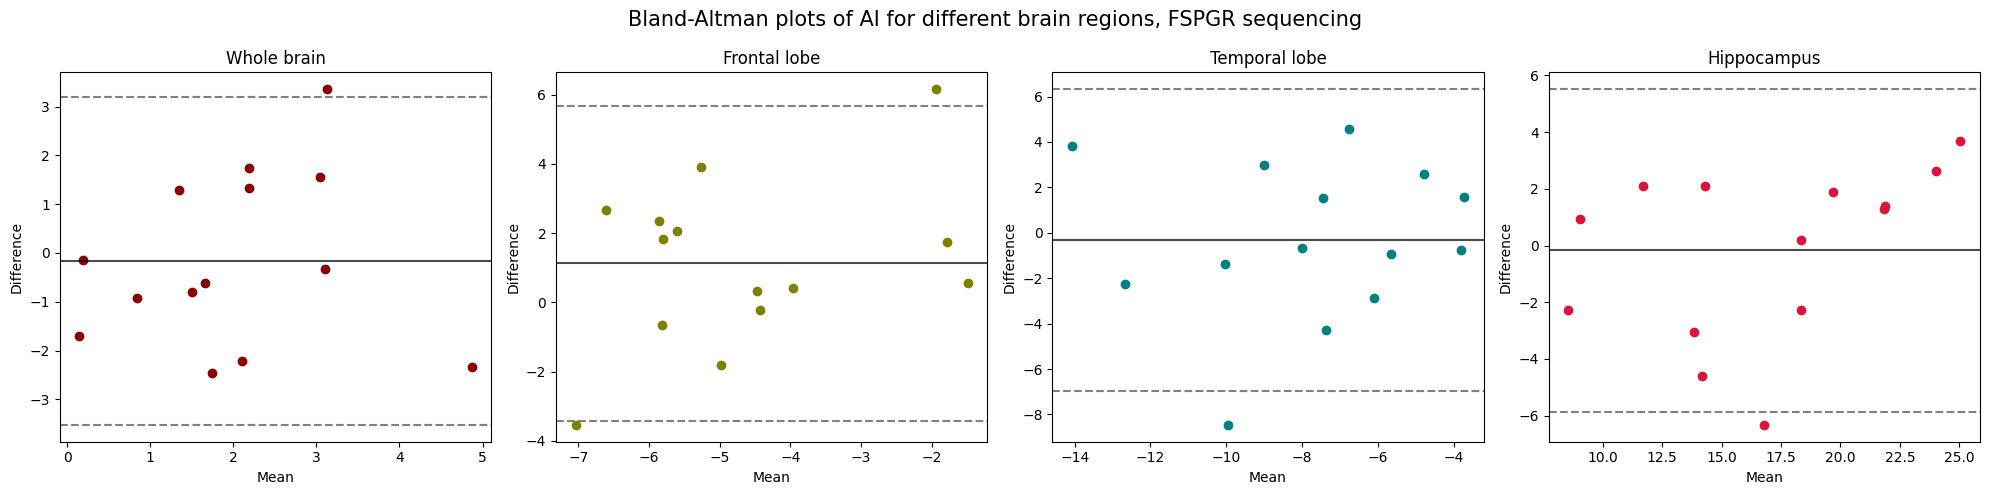

In [72]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  

axes[0].scatter(means_whole_brain_fspgr, diffs_whole_brain_fspgr, color='darkred', marker='o')
axes[0].set_title('Whole brain')
axes[0].set_xlabel('Mean')
axes[0].set_ylabel('Difference')
axes[0].axhline(mean_whole_brain_fspgr, color='black', alpha=0.7, linestyle='-')
axes[0].axhline(LOA_whole_brain_fspgr[0], color='gray', linestyle='--')
axes[0].axhline(LOA_whole_brain_fspgr[1], color='gray', linestyle='--')

axes[1].scatter(means_frontal_lobe_fspgr, diffs_frontal_lobe_fspgr, color='olive', marker='o')
axes[1].set_title('Frontal lobe')
axes[1].set_xlabel('Mean')
axes[1].set_ylabel('Difference')
axes[1].axhline(mean_frontal_lobe_fspgr, color='black', alpha=0.7, linestyle='-')
axes[1].axhline(LOA_frontal_lobe_fspgr[0], color='gray', linestyle='--')
axes[1].axhline(LOA_frontal_lobe_fspgr[1], color='gray', linestyle='--')

axes[2].scatter(means_temporal_lobe_fspgr, diffs_temporal_lobe_fspgr, color='teal', marker='o')
axes[2].set_title('Temporal lobe')
axes[2].set_xlabel('Mean')
axes[2].set_ylabel('Difference')
axes[2].axhline(mean_temporal_lobe_fspgr, color='black', alpha=0.7, linestyle='-')
axes[2].axhline(LOA_temporal_lobe_fspgr[0], color='gray', linestyle='--')
axes[2].axhline(LOA_temporal_lobe_fspgr[1], color='gray', linestyle='--')

axes[3].scatter(means_hippocampus_fspgr, diffs_hippocampus_fspgr, color='crimson', marker='o')
axes[3].set_title('Hippocampus')
axes[3].set_xlabel('Mean')
axes[3].set_ylabel('Difference')
axes[3].axhline(mean_hippocampus_fspgr, color='black', alpha=0.7, linestyle='-')
axes[3].axhline(LOA_hippocampus_fspgr[0], color='gray', linestyle='--')
axes[3].axhline(LOA_hippocampus_fspgr[1], color='gray', linestyle='--')

plt.suptitle('Bland-Altman plots of AI for different brain regions, FSPGR sequencing', fontsize=15)
plt.tight_layout()
#plt.savefig(savePath + 'bland-altman_fspgr.png')
plt.show()

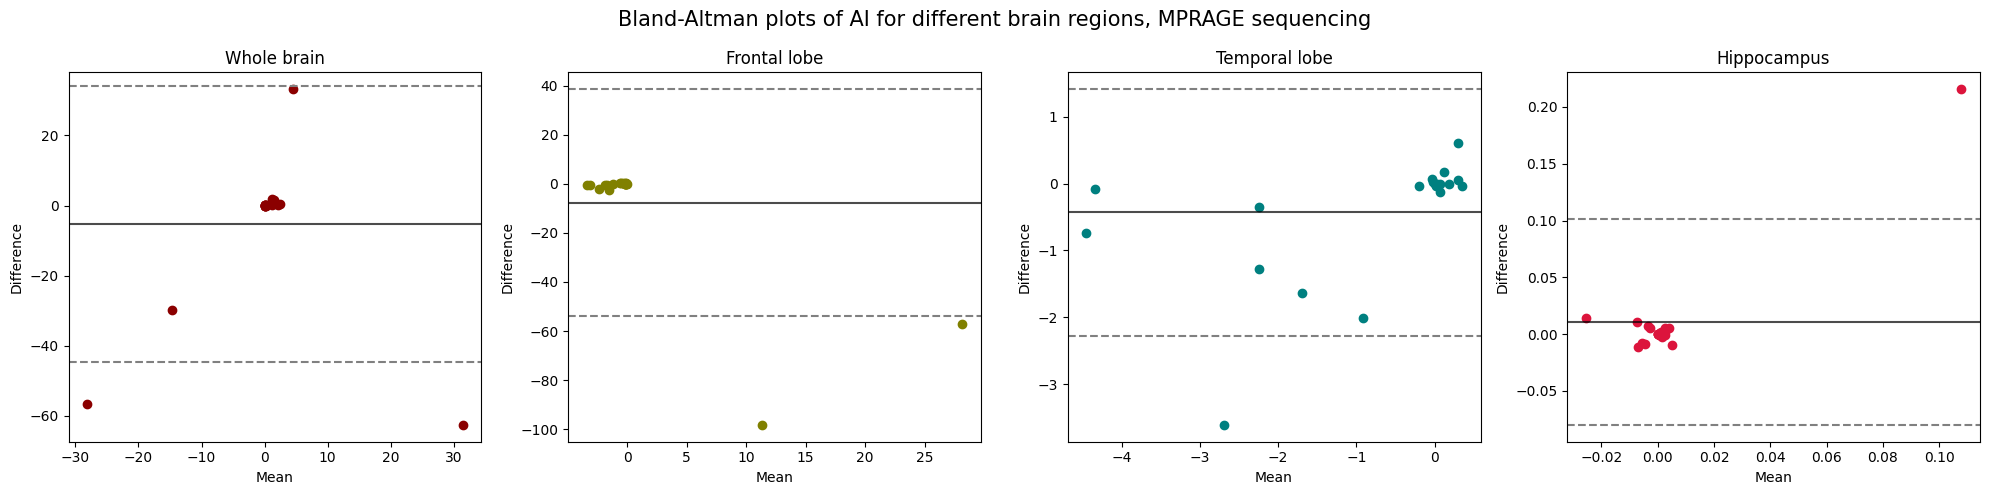

In [73]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

axes[0].scatter(means_whole_brain_mprage, diffs_whole_brain_mprage, color='darkred', marker='o')
axes[0].set_title('Whole brain')
axes[0].set_xlabel('Mean')
axes[0].set_ylabel('Difference')
axes[0].axhline(mean_whole_brain_mprage, color='black', alpha=0.7, linestyle='-')
axes[0].axhline(LOA_whole_brain_mprage[0], color='gray', linestyle='--')
axes[0].axhline(LOA_whole_brain_mprage[1], color='gray', linestyle='--')

axes[1].scatter(means_frontal_lobe_mprage, diffs_frontal_lobe_mprage, color='olive', marker='o')
axes[1].set_title('Frontal lobe')
axes[1].set_xlabel('Mean')
axes[1].set_ylabel('Difference')
axes[1].axhline(mean_frontal_lobe_mprage, color='black', alpha=0.7, linestyle='-')
axes[1].axhline(LOA_frontal_lobe_mprage[0], color='gray', linestyle='--')
axes[1].axhline(LOA_frontal_lobe_mprage[1], color='gray', linestyle='--')

axes[2].scatter(means_temporal_lobe_mprage, diffs_temporal_lobe_mprage, color='teal', marker='o')
axes[2].set_title('Temporal lobe')
axes[2].set_xlabel('Mean')
axes[2].set_ylabel('Difference')
axes[2].axhline(mean_temporal_lobe_mprage, color='black', alpha=0.7, linestyle='-')
axes[2].axhline(LOA_temporal_lobe_mprage[0], color='gray', linestyle='--')
axes[2].axhline(LOA_temporal_lobe_mprage[1], color='gray', linestyle='--')

axes[3].scatter(means_hippocampus_mprage, diffs_hippocampus_mprage, color='crimson', marker='o')
axes[3].set_title('Hippocampus')
axes[3].set_xlabel('Mean')
axes[3].set_ylabel('Difference')
axes[3].axhline(mean_hippocampus_mprage, color='black', alpha=0.7, linestyle='-')
axes[3].axhline(LOA_hippocampus_mprage[0], color='gray', linestyle='--')
axes[3].axhline(LOA_hippocampus_mprage[1], color='gray', linestyle='--')

plt.suptitle('Bland-Altman plots of AI for different brain regions, MPRAGE sequencing', fontsize=15)
plt.tight_layout()
#plt.savefig(savePath + 'bland-altman_mprage.png')
plt.show()